<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-исследования" data-toc-modified-id="Цель-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель исследования</a></span></li><li><span><a href="#Задачи-исследования" data-toc-modified-id="Задачи-исследования-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задачи исследования</a></span></li><li><span><a href="#Характеристика-данных" data-toc-modified-id="Характеристика-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Характеристика данных</a></span></li><li><span><a href="#Подготовка-инструментов" data-toc-modified-id="Подготовка-инструментов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка инструментов</a></span></li><li><span><a href="#Загрузка-и-базовая-предобработка" data-toc-modified-id="Загрузка-и-базовая-предобработка-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Загрузка и базовая предобработка</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Итоги-EDA" data-toc-modified-id="Итоги-EDA-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Итоги EDA</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Оценка-метрик-для-обоих-алгоритмов" data-toc-modified-id="Оценка-метрик-для-обоих-алгоритмов-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Оценка метрик для обоих алгоритмов</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Доли-оттока-по-кластерам" data-toc-modified-id="Доли-оттока-по-кластерам-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Доли оттока по кластерам</a></span></li></ul></li><li><span><a href="#Определение-типичного-пользователя" data-toc-modified-id="Определение-типичного-пользователя-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Определение типичного пользователя</a></span><ul class="toc-item"><li><span><a href="#Характеристика-типичного-пользователя" data-toc-modified-id="Характеристика-типичного-пользователя-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Характеристика типичного пользователя</a></span></li></ul></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Заключение</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Рекомедации" data-toc-modified-id="Рекомедации-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Рекомедации</a></span></li></ul></li></ul></div>

# Сокращение оттока клиентов для финтес-центра<br> "Датасаентист-культурист"

## Цель исследования

Научиться предсказывать отток и принимать маркетинговые меры для сокращения оттока.

## Задачи исследования

1. Построить модель, способную предсказывать факт оттока на основании характеристик клиента.
1. Сформировать типичные портреты клиента.
1. Проанализировать признаки, наиболее сильно влияющие на отток.
1. Выработать рекомендации для повышения удержания клиентов.

## Характеристика данных

В нашем распоряжении датасет с характеристиками клиентов фитнес-центра за предыдущий месяц и фактом оттока. Каждое наблюдение - сведения об одном клиенте.

## Подготовка инструментов

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from itertools import product

## Загрузка и базовая предобработка

In [2]:
try:
    data = pd.read_csv('gym_churn.csv')
except:
    data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
data = data.rename(columns=lambda x: x.lower())

In [5]:
data.duplicated().sum()

0

In [6]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## EDA

In [7]:
anomaly_overview = data.describe()
anomaly_overview = anomaly_overview.T
anomaly_overview['bottom_whisker'] = anomaly_overview['25%'] - 1.5 * (anomaly_overview['75%'] - anomaly_overview['25%'])
anomaly_overview['upper_whisker'] = anomaly_overview['75%'] + 1.5 * (anomaly_overview['75%'] - anomaly_overview['25%'])
anomaly_overview

,count,mean,std,min,25%,50%,75%,max,bottom_whisker,upper_whisker
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000,-1.500000,2.500000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000,-6.500000,13.500000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000,21.000000,37.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740,-144.252362,424.070817
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000,-6.500000,13.500000


In [8]:
data = data.query('avg_class_frequency_current_month <= 4 or lifetime <= 11 or avg_additional_charges_total <= 424.07')
data = data.query('age > 18 and age <= 37')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3984 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             3984 non-null   int64  
 1   near_location                      3984 non-null   int64  
 2   partner                            3984 non-null   int64  
 3   promo_friends                      3984 non-null   int64  
 4   phone                              3984 non-null   int64  
 5   contract_period                    3984 non-null   int64  
 6   group_visits                       3984 non-null   int64  
 7   age                                3984 non-null   int64  
 8   avg_additional_charges_total       3984 non-null   float64
 9   month_to_end_contract              3984 non-null   float64
 10  lifetime                           3984 non-null   int64  
 11  avg_class_frequency_total          3984 non-null   float

In [9]:
churn_features_mean = data.pivot_table(index = 'churn', values = ['near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'], aggfunc = 'mean').reset_index()
churn_features_mean

,churn,age,avg_additional_charges_total,avg_class_frequency_current_month,avg_class_frequency_total,contract_period,group_visits,lifetime,month_to_end_contract,near_location,partner,phone,promo_friends
0,0,29.938824,158.365286,2.025956,2.022839,5.740943,0.464115,4.706083,5.276145,0.872864,0.534176,0.903281,0.353042
1,1,26.996219,115.229736,1.044896,1.474254,1.730624,0.269376,0.990548,1.664461,0.768431,0.355388,0.903592,0.184310


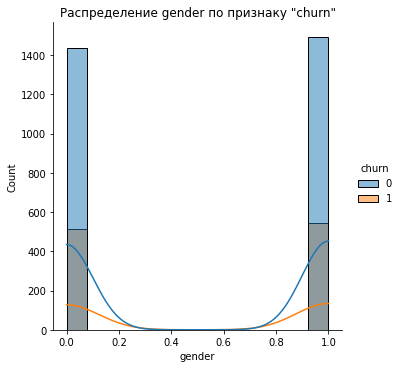

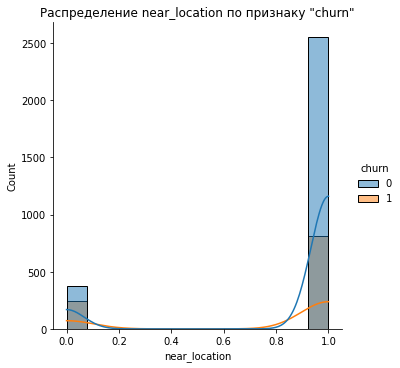

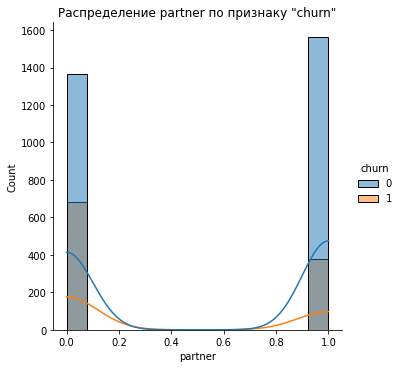

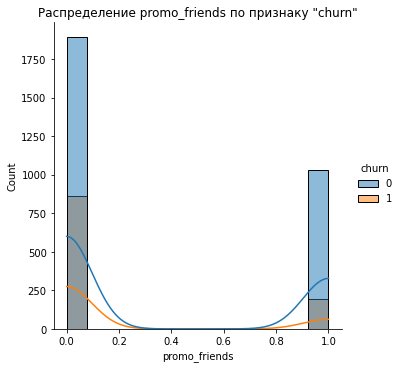

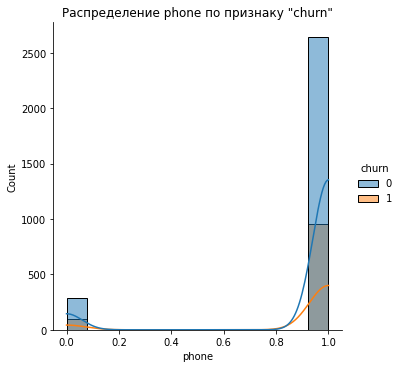

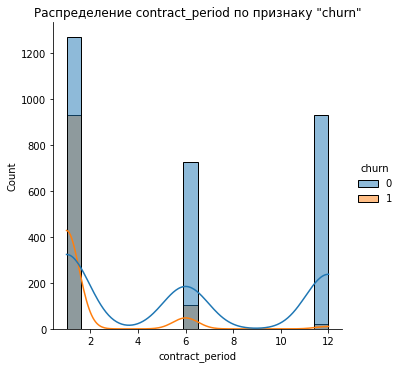

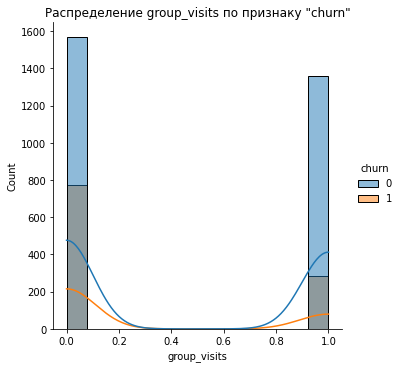

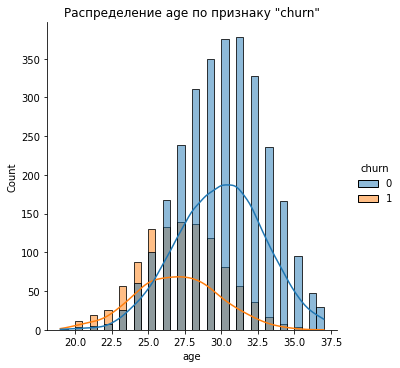

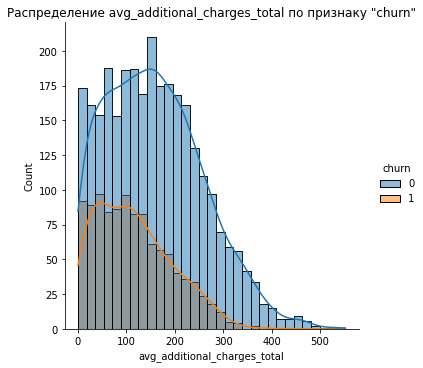

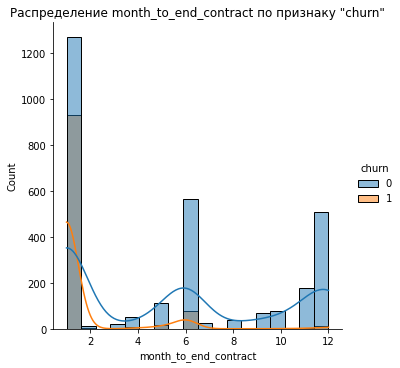

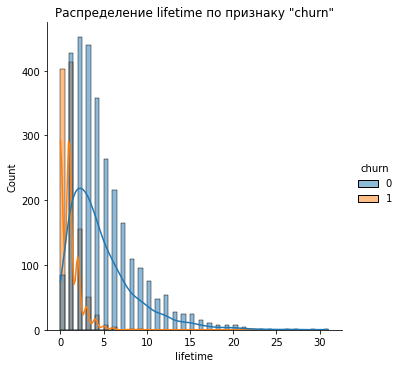

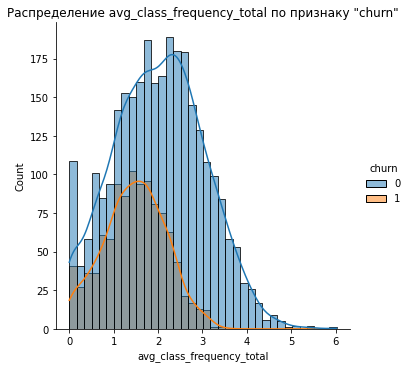

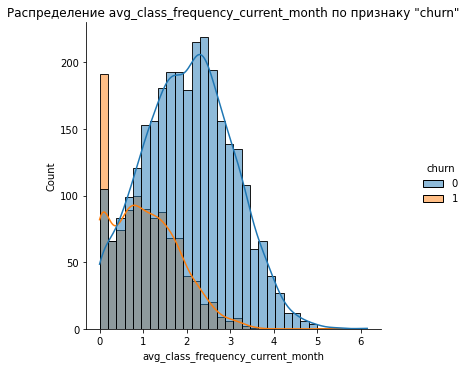

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


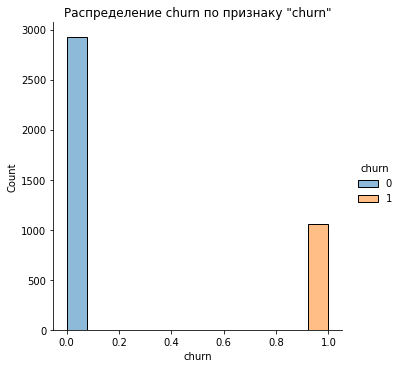

In [10]:
for feature in data.columns:
    sns.displot(data=data, x=feature, hue='churn', kde=True)
    plt.title(f'Распределение {feature} по признаку "churn"')
    plt.show()

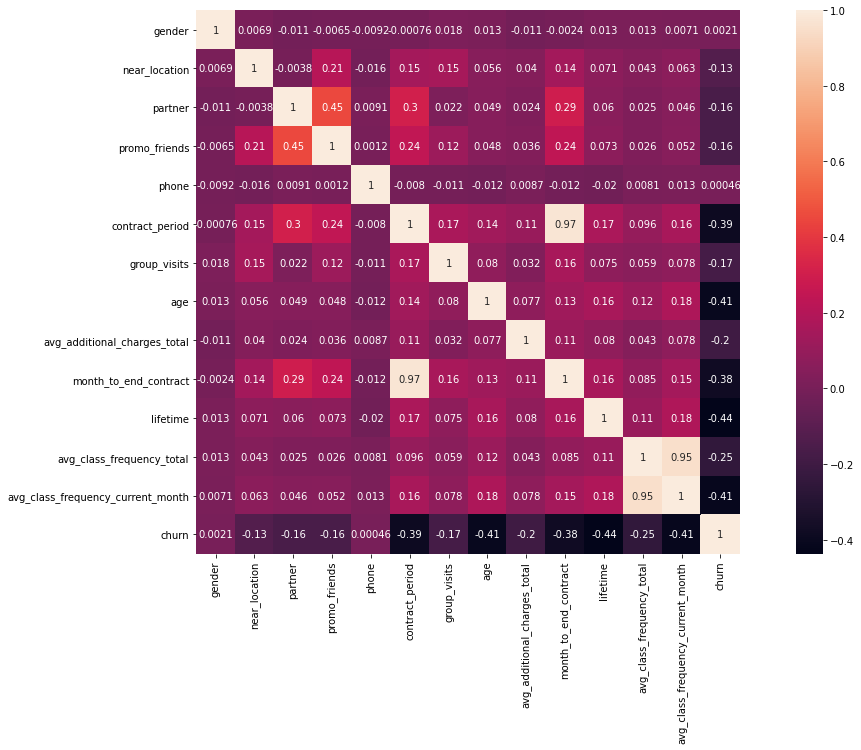

In [11]:
cm = data.corr()
plt.figure(figsize = (20,10))
sns.heatmap(cm, annot=True, square=True)
plt.show();

In [12]:
data = data.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis = 1)

In [13]:
X = data.drop('churn', axis = 1)
y = data['churn']
RANDOM_STATE = 0
TEST_SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=TEST_SIZE, random_state = RANDOM_STATE)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

### Итоги EDA

1. В датасете 400 тысячи строк, пропуски отсутствуют, все данные - количественные.
1. Выполнена предобработка:
    * приведение именования колонок к нижнему регистру,
    * удаление коллинеарных признаков, а именно month_to_end_contract и avg_class_frequency_total,
    * данные стандартизованы для лучшего понимания вклада каждого признака в общую сумму.
1. Обзор аномалий показывает, что ряд признаков содержит выбросы, а именно:
    * возраст,
    * сумма дополнительных платежей,
    * лайфтайм клиента,
    * средняя частота посещений в неделю за последний месяц.
1. Общая доля наблюдений, содержащих выбросы в тех или иных признаках, составляет менее 1% от всего датасета. Эти наблюдения удалены.
1. Средние значения признаков всегда выше у тех, кто не попал в отток, кроме случаев near_location и partner. Для этих последних признаков средние значения групп "оттока" и "не-оттока" близки или совпадают.


## Модель прогнозирования оттока клиентов
### Логистическая регрессия

In [14]:
lr_model = LogisticRegression(solver = 'liblinear', random_state = RANDOM_STATE)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
#lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

### Случайный лес

In [15]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=RANDOM_STATE)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
#rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

### Оценка метрик для обоих алгоритмов

In [16]:
def print_all_metrics(y_true, y_pred):
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

display('Метрики для логистической регрессии')
print_all_metrics(y_test, lr_predictions)

display('Метрики для случайного леса')
print_all_metrics(y_test, rf_predictions)

'Метрики для логистической регрессии'

	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.83


'Метрики для случайного леса'

	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.80


Похоже, обе модели адекватно решают задачу, так как наиболее важная в данном случае метрика точности - Accuracy - в обоих случаях одинаково высока.

## Кластеризация клиентов

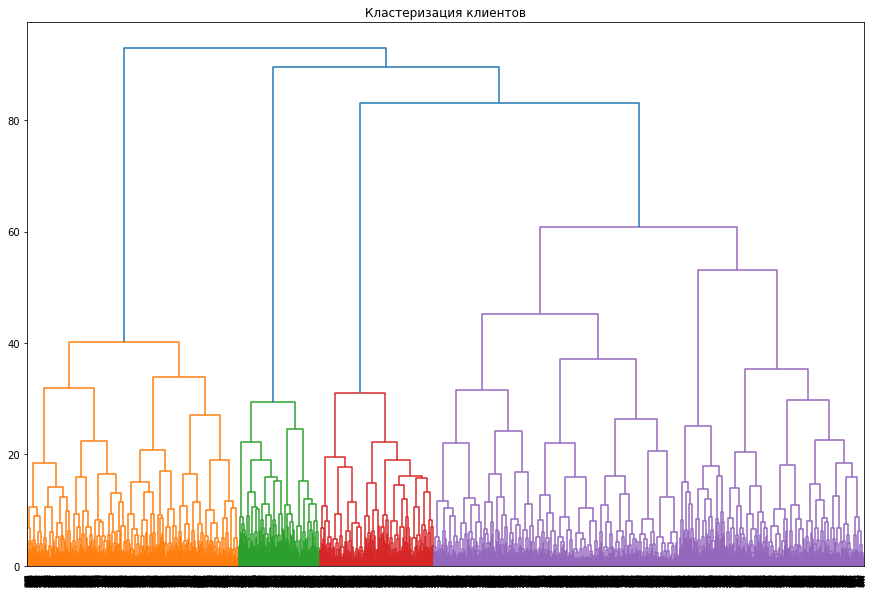

In [17]:
sc = StandardScaler()
X_sc = sc.fit_transform(data.drop(columns = 'churn'))
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов')
plt.show()

In [18]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)

In [19]:
data['cluster'] = labels
display(data.head())
avg_by_cluster = data.groupby('cluster').agg('mean').round(4).reset_index()
avg_by_cluster

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0,1


,cluster,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,0,0.5247,0.8623,0.4727,0.3065,0.0,4.7870,0.4286,29.2753,144.3496,3.9481,1.7242,0.2649
1,1,0.4975,0.9959,0.8924,1.0000,1.0,6.8680,0.5218,29.5360,153.0531,4.2518,1.9097,0.1249
2,2,0.5372,0.9958,0.4098,0.0096,1.0,6.5541,0.5234,30.6476,175.6041,5.5817,2.3419,0.0117
3,3,0.5000,1.0000,0.1980,0.0645,1.0,1.9561,0.3056,27.7625,122.9077,1.9722,1.2502,0.5358
4,4,0.5000,0.0000,0.4874,0.0791,1.0,2.9928,0.2338,28.6799,137.3631,2.9694,1.5959,0.4029


По средним значениям признаков для каждого кластера видно, что наименьший отток показывают клиенты кластера 2. У них также самый большой средний возраст, самая высокая сумма дополнительных платежей и наиболее длительный лайфтайм. Кроме того, они чаще посещали зал в последний месяц.

Самый высокий отток показали клиенты кластера 3. Они чаще всех работают рядом с залом, имеют самый короткий срок контракта, они самые молодые из всех клиентов и менее всех оплатили дополнительных услуг. Кроме того, у клиентов этого кластера самый короткий лайфтайм и самое редкое посещение зала в целом за последний месяц.

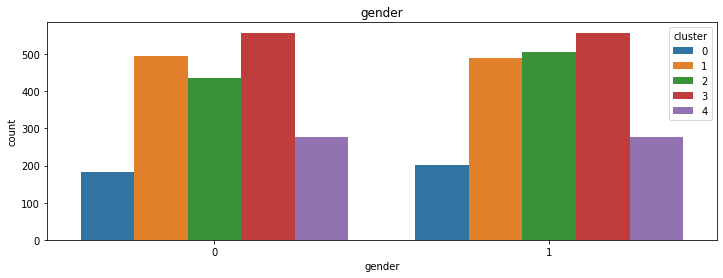

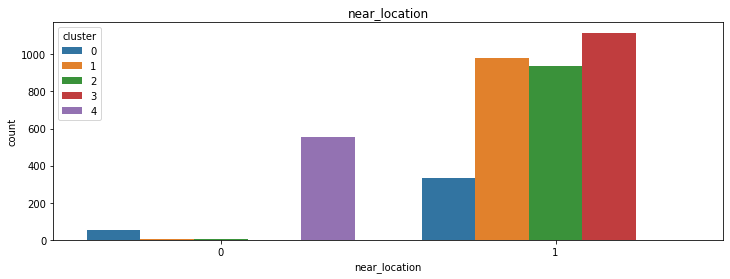

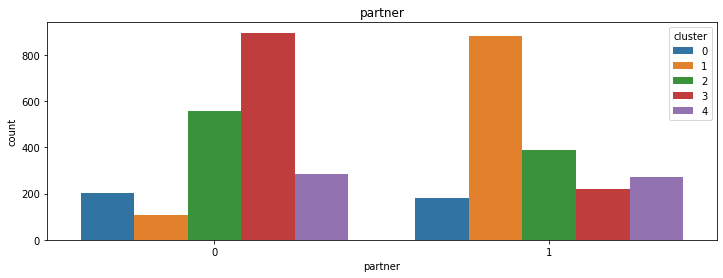

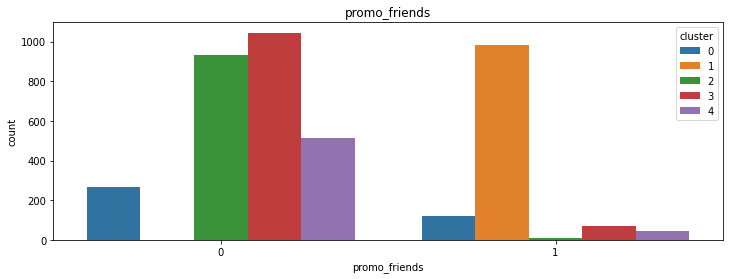

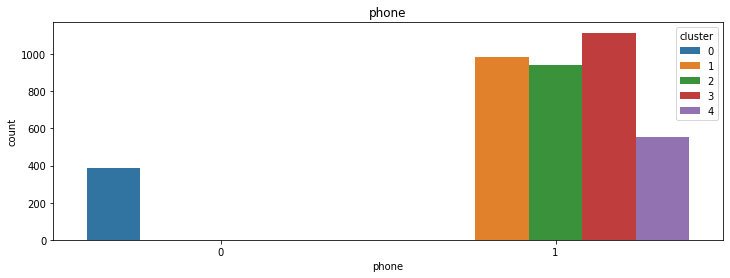

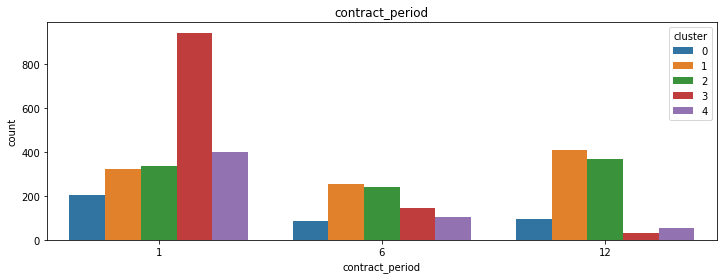

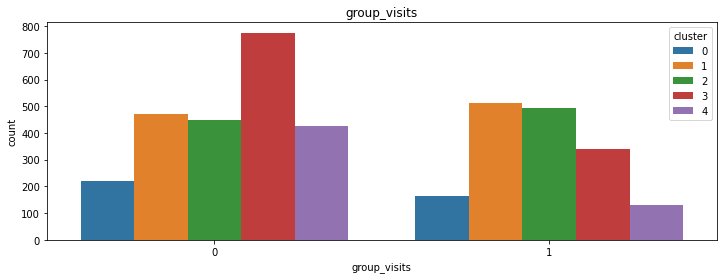

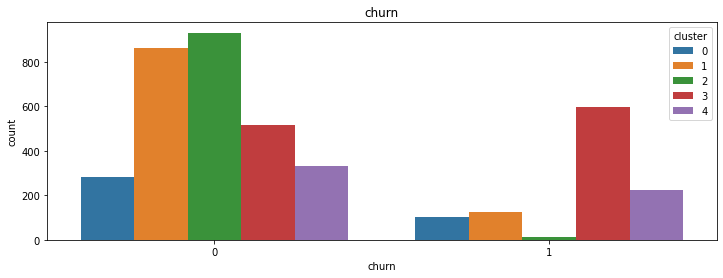

In [20]:
categorical_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'churn']

for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=data[column], hue="cluster", data=data)
    plt.title(column)
    plt.show()

In [21]:
def show_num_feature_distribution(cluster, column):
    temp_data = data.query(f'cluster == {cluster}')
    print(f'Распределение признака {column} для кластера {cluster}')
    plt.figure(figsize=(12, 4))
    sns.histplot(data=temp_data, x = column, kde = True)
    plt.title(column)
    plt.show()

Распределение признака age для кластера 0


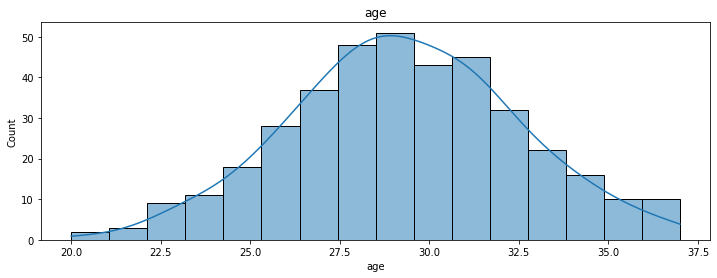

Распределение признака avg_additional_charges_total для кластера 0


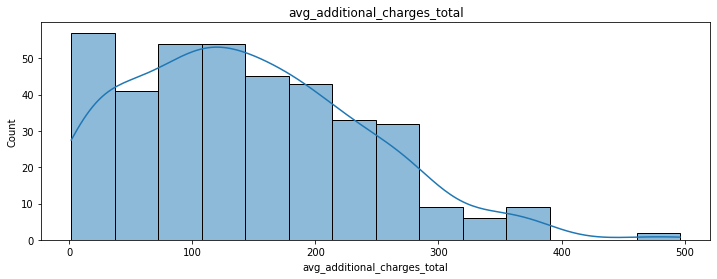

Распределение признака lifetime для кластера 0


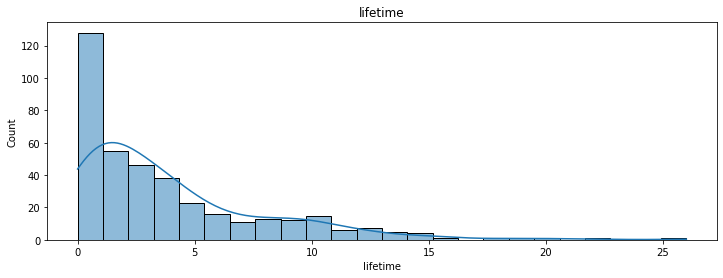

Распределение признака avg_class_frequency_current_month для кластера 0


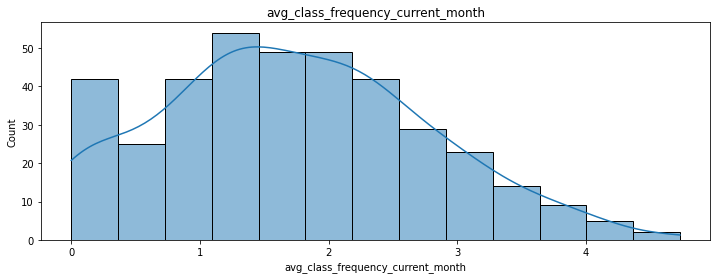

Распределение признака age для кластера 1


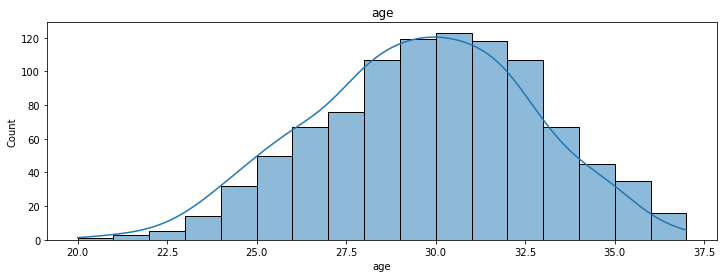

Распределение признака avg_additional_charges_total для кластера 1


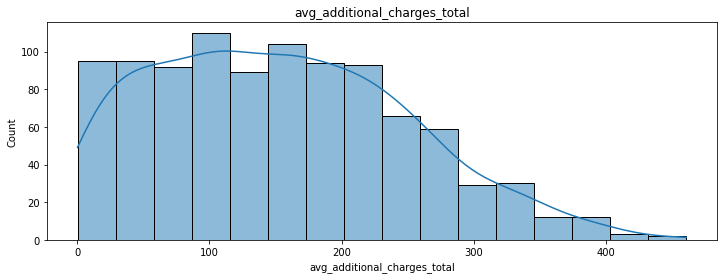

Распределение признака lifetime для кластера 1


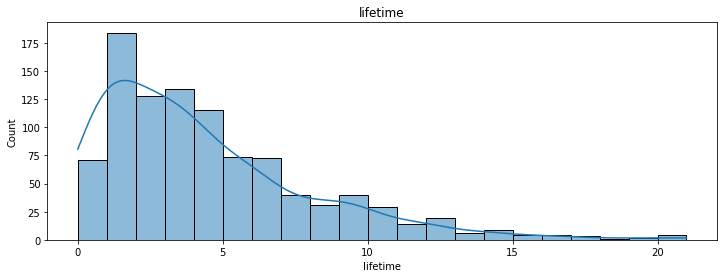

Распределение признака avg_class_frequency_current_month для кластера 1


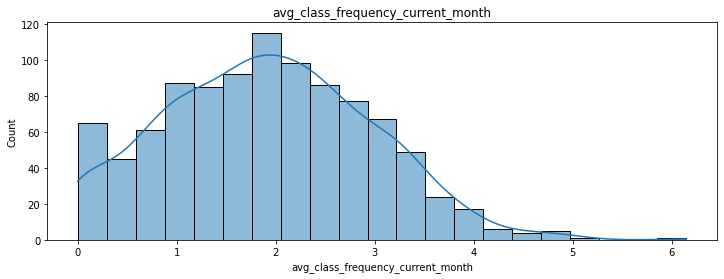

Распределение признака age для кластера 2


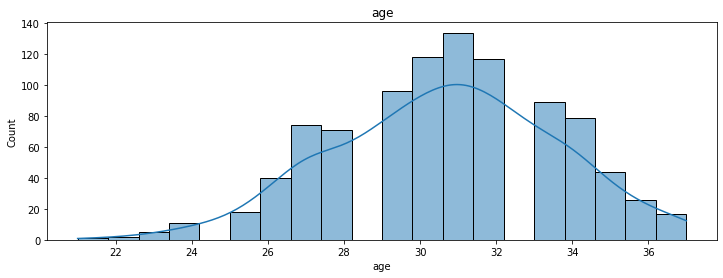

Распределение признака avg_additional_charges_total для кластера 2


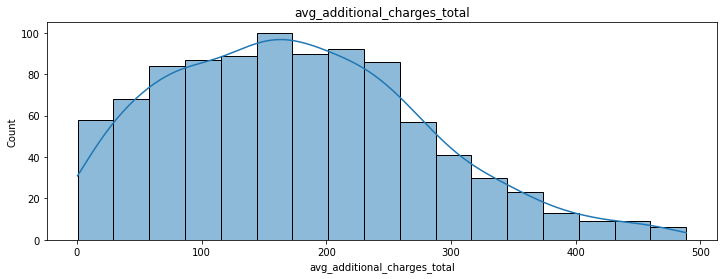

Распределение признака lifetime для кластера 2


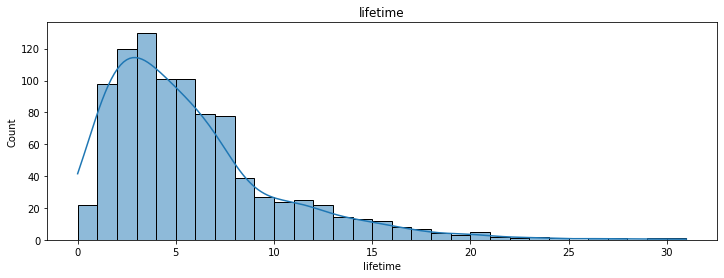

Распределение признака avg_class_frequency_current_month для кластера 2


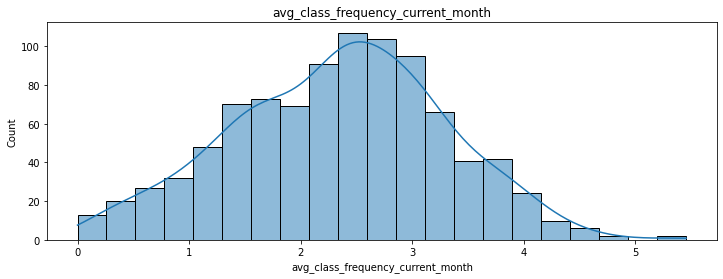

Распределение признака age для кластера 3


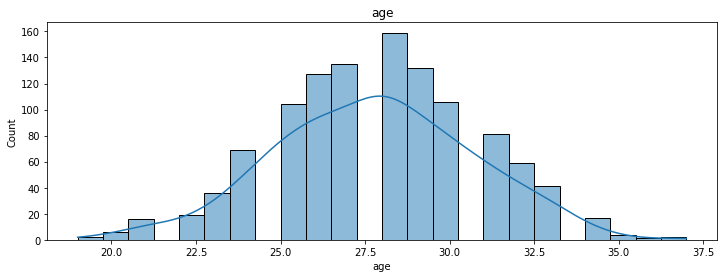

Распределение признака avg_additional_charges_total для кластера 3


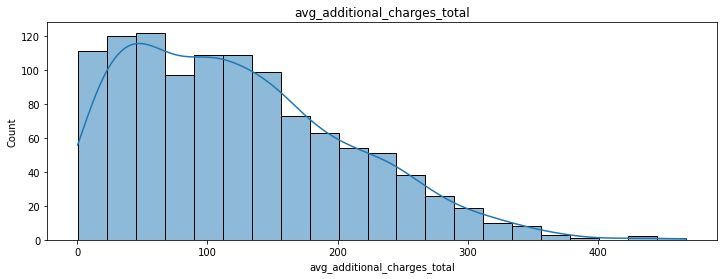

Распределение признака lifetime для кластера 3


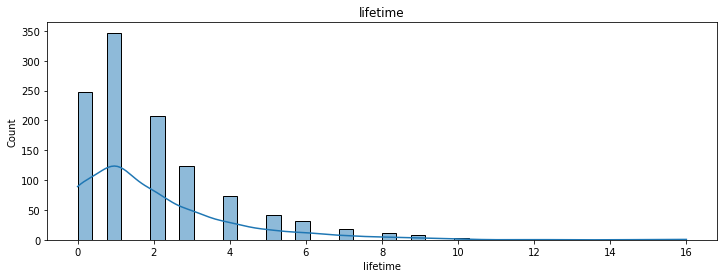

Распределение признака avg_class_frequency_current_month для кластера 3


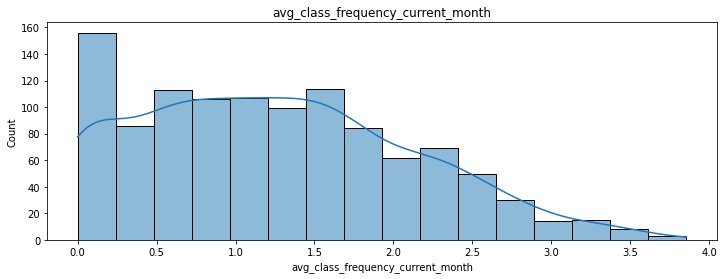

Распределение признака age для кластера 4


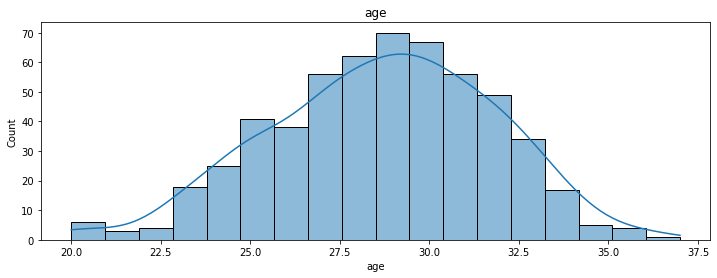

Распределение признака avg_additional_charges_total для кластера 4


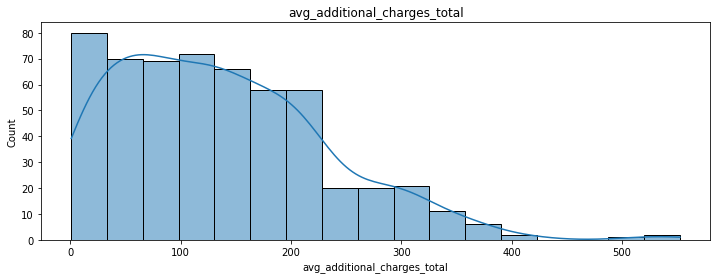

Распределение признака lifetime для кластера 4


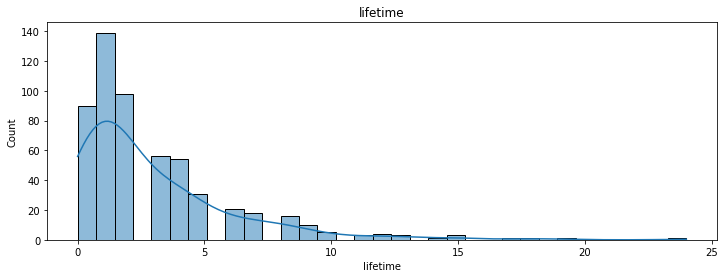

Распределение признака avg_class_frequency_current_month для кластера 4


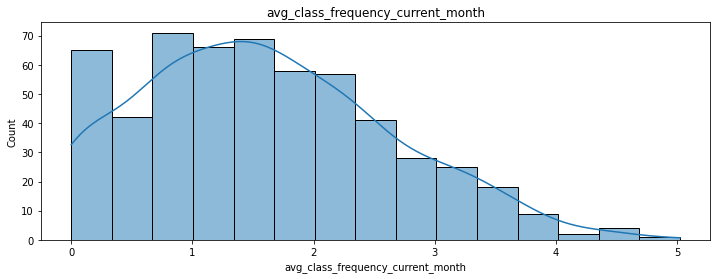

In [22]:
clusters = [0, 1, 2, 3, 4]
numeric_columns = ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_current_month']

pairs = product(clusters, numeric_columns)

result_pairs = pd.DataFrame(list(pairs), columns=['clusters', 'columns'])

for row in result_pairs.iterrows():
    show_num_feature_distribution(row[1].clusters, row[1].columns)


1. Ряд качественных признаков — gender, near_location, phone – не влияют на отток.
1. Признаки partner и promo_friends влияют отчасти:
    * партнерство между работодателем и залом помогает удерживать клиентов;
    * привлечение друзей по акции не помогает удерживать клиентов, вероятно, в силу импульсивности решения пойти в зал за компанию без уверенной мотивации.
1. Длительность контракта, общая посещаемость и посещение групповых занятий определенно имеют прямое положительное влияние на удержание.
1. Что касается численных признаков, то их распределения в каждом кластере выглядят похожими. Это говорит о том, что ключевыми признаками для кластеризации являются все-таки признаки качественные.

### Доли оттока по кластерам

In [23]:
churn_rate_by_cluster = data.pivot_table(index = 'cluster', values = 'churn', aggfunc = 'count').reset_index()
churn_rate_by_cluster.columns = ['cluster', 'cluster_count']
churn_count = data.groupby('cluster')['churn'].agg('sum').reset_index()
churn_rate_by_cluster['churn_count'] = churn_count['churn']
churn_rate_by_cluster['churn_rate'] = churn_rate_by_cluster['churn_count'] / churn_rate_by_cluster['cluster_count'] * 100
display('Доля оттока в каждом кластере:', churn_rate_by_cluster)
general_churn = data['churn'].sum() / data['churn'].count() * 100
display('Общая доля оттока:', general_churn)

'Доля оттока в каждом кластере:'

,cluster,cluster_count,churn_count,churn_rate
0,0,385,102,26.493506
1,1,985,123,12.487310
2,2,942,11,1.167728
3,3,1116,598,53.584229
4,4,556,224,40.287770


'Общая доля оттока:'

26.556224899598398

1. Сильнее всего склонны к оттоку кластеры 3 и 4 (от 40 до 53% клиентов уходят).
1. Наиболее надежные кластеры - 1 и 2 (12,5 и 1,2% оттока соответственно).
1. Кластер 0 показывает чуть более четверти оттока (26,5%) - это значение примерно совпадает с общей долей оттока.

## Определение типичного пользователя

In [24]:
average_age = data['age'].mean()
usual_contract_period = data['contract_period'].value_counts()
average_additional_charges = data['avg_additional_charges_total'].mean()
average_lifetime = data['lifetime'].mean()
average_class_frequency_current_month = data['avg_class_frequency_current_month'].mean()

gender_counts = data['gender'].value_counts()
near_location_counts = data['near_location'].value_counts()
partner_counts = data['partner'].value_counts()
promo_friends_counts = data['promo_friends'].value_counts()
group_visits_counts = data['group_visits'].value_counts()

In [25]:
display('Средний возраст:', average_age.round(2),\
        'Длительность контракта:', usual_contract_period,\
        'Средняя стоиомсть дополнительных услуг:', average_additional_charges.round(2),\
        'Средний лайфтафм:', average_lifetime.round(2),\
        'Посещения в текущем месяце:', average_class_frequency_current_month.round(2),\
        'Групповые занятия:', group_visits_counts,\
        'Пол:', gender_counts,\
        'Расположение:', near_location_counts,\
        'Партнерство:', partner_counts,\
        'Акция:', promo_friends_counts)

'Средний возраст:'

29.16

'Длительность контракта:'

1     2201
12     955
6      828
Name: contract_period, dtype: int64

'Средняя стоиомсть дополнительных услуг:'

146.91

'Средний лайфтафм:'

3.72

'Посещения в текущем месяце:'

1.77

'Групповые занятия:'

0    2341
1    1643
Name: group_visits, dtype: int64

'Пол:'

1    2034
0    1950
Name: gender, dtype: int64

'Расположение:'

1    3367
0     617
Name: near_location, dtype: int64

'Партнерство:'

0    2045
1    1939
Name: partner, dtype: int64

'Акция:'

0    2756
1    1228
Name: promo_friends, dtype: int64

### Характеристика типичного пользователя
Это мужчина или женщина приблизительно 29 лет, чье место работы расположено поблизости от фитнес-центра. Он или она посещает зал приблизительно дважды в неделю, в том числе принимает участие в групповых занятиях. Длиетльность его или ее лайфтайма в качестве клинета зада - чуть менее 4 месяцев, и он или она оплачивает дополнительные услуши на сумму порядка 150 рублей.

**NB!**  Несмотря на то, что клиенты часто покупают абонемент на 1 месяц (2201 случай), эту длительность конракта нельзя назвать типовой, так как именно такая длительность показывает большой отток.

## Заключение

### Выводы
1. Менее всего подвержены оттоку клиенты 29 - 30 лет со сроком контракта 6 и более месяцев и двукратным посещением зала в течение недели.
1. Более всего подвержены оттоку клиенты 27 - 28 лет со сроком контракта не более 3 месяцев и посещением зала менее 2 раз в неделю.
1. Кроме того, отток сокращается при длительности лайфтайма от 4 месяцев.
1. При значении признака посещения групповых занятий более 0,5 отток также сокращается.
1. Привлечение клиентов по акции "Приведи друга" в долгосрочной перспективе не оправдывает себя.

### Рекомедации
1. Проработать программу скидок на дополнительные услуги при посещении групповых занятий  и/или при посещении центра от 2 раз в неделю.
1. Придумать систему поощрения клиентов за длительность лайфтайма: например, по достижении определенной длительности лайфтафма клиент получает бесплатный урок с инструктором и оценку своего прогресса/рекомендации для дальнейшей работы в зале.
1. Связать длительность контракта и welcome-box: например, при покупке абонемента на 4 месяца и более - бесплатное составление программы занятий в соответствии с целями, которые ставит себе клиент, плюс 2-3 занятия с инструктором.